In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
    


Using TensorFlow backend.


In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image


from keras import backend as K

num_classes = 7
#img_rows, img_cols = 605, 700
img_rows, img_cols = 140, 140

# 引入Tensorboard
from keras.callbacks import TensorBoard
from keras.utils import plot_model

In [3]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

def read_image(img_name):
    im = Image.open(img_name).convert('RGB')
    #im.save(img_name+".jpg")
    #im = tf.gfile.FastGFile(img_name, 'rb').read()
    #img_data = tf.image.decode_jpeg(im)
    #img_data = tf.image.convert_image_dtype(img_data, dtype=tf.float32)
    #resized = tf.image.resize_images(img_data, [30, 30], method=0)
    #print(resized)
    #im.show()
    data = np.array(im)
    return data

images = []

filename = os.listdir('D://alldata/all_black140gauss1')
#print(filename)
for fn in filename:
    if fn.endswith('.jpg'):
        fd = os.path.join('D://alldata/all_black140gauss1',fn)
        #print(fd[3])
        #data1 = read_image(fd)
        #data2 = tf.image.convert_image_dtype(data1, dtype=tf.float32)
        #data3 = tf.image.resize_images(data2, [30, 30], method=0) 
        #images.append(data3)
        images.append(read_image(fd))
print('load success!')
X = np.array(images)
print (X.shape)

load success!
(1758, 140, 140, 3)


In [4]:
import csv
csv_reader = csv.reader(open("D://alldata/labels1.csv"))
for row in csv_reader:
    column1 = [row[0]for row in csv_reader]
    #print(column1)
    

Y = np.array(column1)
print(Y[4])



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 0)


img_type = 3

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], img_type, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], img_type, img_rows, img_cols)
    input_shape = (img_type, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, img_type)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, img_type)
    input_shape = (img_rows, img_cols, img_type)
    
    
    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0


for i in range(len(Y_train)):
    if Y_train[i] == 'Basal': #Basal cell of prostate epithelium  前列腺上皮基底细胞（1136）
        Y_train[i] = 0
    elif Y_train[i] == 'CNS': #CNS neuron (sensu Vertebrata) 中枢神经系统神经元（椎骨感觉）（356）
        Y_train[i] = 1
    elif Y_train[i] == 'NEUTROPHIL': #中性白细胞
        Y_train[i] = 2
    elif Y_train[i] == 'BASOPHIL': #嗜碱细胞
        Y_train[i] = 3
    elif Y_train[i] == 'EOSINOPHIL': #嗜酸红细胞
        Y_train[i] = 4
    elif Y_train[i] == 'MONOCYTE': #单核白血球
        Y_train[i] = 5
    elif Y_train[i] == 'LYMPHOCYTE': #淋巴细胞
        Y_train[i] = 6
    else:
        print('ERROR')
        
for i in range(len(Y_test)):
    if Y_test[i] == 'Basal': #Basal cell of prostate epithelium  前列腺上皮基底细胞（1136）
        Y_test[i] = 0
    elif Y_test[i] == 'CNS': #CNS neuron (sensu Vertebrata) 中枢神经系统神经元（椎骨感觉）（356）
        Y_test[i] = 1
    elif Y_test[i] == 'NEUTROPHIL': #中性白细胞
        Y_test[i] = 2
    elif Y_test[i] == 'BASOPHIL': #嗜碱细胞
        Y_test[i] = 3
    elif Y_test[i] == 'EOSINOPHIL': #嗜酸红细胞
        Y_test[i] = 4
    elif Y_test[i] == 'MONOCYTE': #单核白血球
        Y_test[i] = 5
    elif Y_test[i] == 'LYMPHOCYTE': #淋巴细胞
        Y_test[i] = 6
    else:
        print('ERROR')

print(Y_train)
print(Y_test)



NEUTROPHIL
['0' '0' '1' ..., '1' '0' '0']
['0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '2' '2' '1' '5' '4' '0' '0' '0'
 '2' '4' '0' '0' '2' '0' '0' '0' '1' '6' '2' '4' '1' '1' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '1' '0' '1' '0' '4' '1' '0'
 '1' '0' '6' '0' '0' '0' '0' '0' '0' '4' '0' '2' '1' '0' '0' '2' '0' '4'
 '0' '0' '0' '4' '1' '6' '0' '0' '1' '4' '2' '0' '5' '0' '1' '0' '1' '0'
 '0' '2' '1' '6' '0' '0' '0' '2' '6' '0' '0' '0' '0' '2' '0' '0' '0' '0'
 '2' '0' '1' '0' '0' '0' '4' '0' '1' '0' '5' '0' '1' '1' '3' '0' '0' '0'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '1' '1' '0' '0'
 '0' '0' '1' '4' '1' '0' '2' '1' '2' '2' '2' '0' '0' '0' '0' '0' '2' '2'
 '0' '0' '0' '0' '0' '1' '0' '1' '2' '4' '0' '0' '1' '0' '5' '0' '0' '0'
 '0' '0' '0' '0' '0' '2' '0' '0' '4' '1' '1' '0' '1' '0' '0' '4' '0' '0'
 '0' '2' '0' '0' '1' '4' '2' '0' '0' '1' '0' '0' '0' '2' '4' '0' '4' '0'
 '0' '4' '0' '0' '1' '0' '0' '0' '0' '4' '1' '0' '0' '6' '0' '0' '0' '1'
 '0' '2' 

In [5]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [6]:
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.layers import Dropout

Inp = Input(input_shape)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
x = base_model(Inp)
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)


# 遗忘率：
x = Dropout(0.4)(x)

# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(7, activation='softmax')(x)                                            #标签种类！！！！！！！！！！！！！
 
# this is the model we will train
model = Model(inputs=Inp, outputs=predictions)
 
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 140, 140, 3)       0         
_________________________________________________________________
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 7175      
Total params: 23,908,135
Trainable params: 2,105,351
Non-trainable params: 21,802,784
________________________________________________________

In [8]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_2
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [9]:
N = 20
for layer in model.layers[:-N]:
   layer.trainable = False
for layer in model.layers[-N:]:
  layer.trainable = True

In [10]:
sgd = keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=1e-6, nesterov=True)
adam = keras.optimizers.adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=None,decay=1e-6,amsgrad=False)
adadelta = keras.optimizers.Adadelta(lr=0.001,rho=0.95,epsilon=None,decay=0)
adagrad = keras.optimizers.Adagrad(lr=0.1,epsilon=None,decay=0)

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=adadelta, metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=80, validation_data=(X_test, Y_test))

Train on 1406 samples, validate on 352 samples
Epoch 1/80
1406/1406 [==============================] - 128s 91ms/step - loss: 2.3785 - acc: 0.0612 - val_loss: 2.1396 - val_acc: 0.0909
Epoch 2/80
1406/1406 [==============================] - 127s 90ms/step - loss: 2.1909 - acc: 0.0797 - val_loss: 1.9689 - val_acc: 0.1534
Epoch 3/80
1406/1406 [==============================] - 132s 94ms/step - loss: 2.0000 - acc: 0.1622 - val_loss: 1.8216 - val_acc: 0.2727
Epoch 4/80
1406/1406 [==============================] - 135s 96ms/step - loss: 1.8464 - acc: 0.2354 - val_loss: 1.6974 - val_acc: 0.4318
Epoch 5/80
1406/1406 [==============================] - 135s 96ms/step - loss: 1.7489 - acc: 0.3151 - val_loss: 1.6001 - val_acc: 0.5170
Epoch 6/80
1406/1406 [==============================] - 135s 96ms/step - loss: 1.6653 - acc: 0.3748 - val_loss: 1.5204 - val_acc: 0.5426
Epoch 7/80
1406/1406 [==============================] - 135s 96ms/step - loss: 1.5692 - acc: 0.4239 - val_loss: 1.4606 - val_acc: 0

Epoch 60/80
1406/1406 [==============================] - 143s 102ms/step - loss: 1.0391 - acc: 0.5917 - val_loss: 1.0237 - val_acc: 0.5938
Epoch 61/80
1406/1406 [==============================] - 144s 102ms/step - loss: 1.0353 - acc: 0.5747 - val_loss: 1.0224 - val_acc: 0.5938
Epoch 62/80
1406/1406 [==============================] - 143s 102ms/step - loss: 1.0310 - acc: 0.5967 - val_loss: 1.0213 - val_acc: 0.5938
Epoch 63/80
1406/1406 [==============================] - 143s 102ms/step - loss: 1.0455 - acc: 0.5804 - val_loss: 1.0200 - val_acc: 0.5938
Epoch 64/80
1406/1406 [==============================] - 143s 102ms/step - loss: 1.0538 - acc: 0.5789 - val_loss: 1.0182 - val_acc: 0.5938
Epoch 65/80
1406/1406 [==============================] - 143s 102ms/step - loss: 1.0540 - acc: 0.5782 - val_loss: 1.0173 - val_acc: 0.5966
Epoch 66/80
1406/1406 [==============================] - 143s 102ms/step - loss: 1.0443 - acc: 0.5846 - val_loss: 1.0152 - val_acc: 0.5966
Epoch 67/80
1406/1406 [====

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


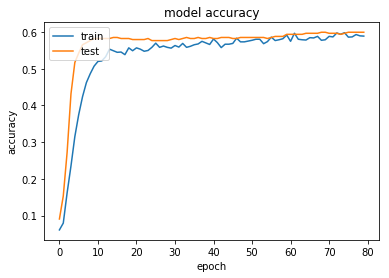

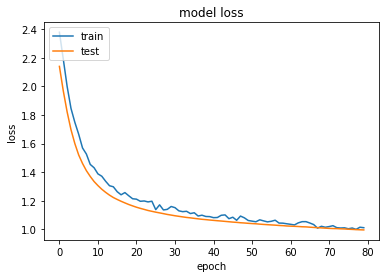

In [13]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()